# **MQL Olist**

In [2]:
import pandas as pd
import numpy as py  

In [3]:


df_mql = pd.read_csv('../olist_marketing_qualified_leads_dataset.csv')
df_closed_deals = pd.read_csv('../olist_closed_deals_dataset.csv')


In [4]:
df_mql.head()

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [5]:
df_mql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   mql_id              8000 non-null   object
 1   first_contact_date  8000 non-null   object
 2   landing_page_id     8000 non-null   object
 3   origin              7940 non-null   object
dtypes: object(4)
memory usage: 250.1+ KB


In [6]:
df_closed_deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         842 non-null    object 
 1   seller_id                      842 non-null    object 
 2   sdr_id                         842 non-null    object 
 3   sr_id                          842 non-null    object 
 4   won_date                       842 non-null    object 
 5   business_segment               841 non-null    object 
 6   lead_type                      836 non-null    object 
 7   lead_behaviour_profile         665 non-null    object 
 8   has_company                    63 non-null     object 
 9   has_gtin                       64 non-null     object 
 10  average_stock                  66 non-null     object 
 11  business_type                  832 non-null    object 
 12  declared_product_catalog_size  69 non-null     flo

## Data Cleaning and Standarization

In [7]:
# Tabel mql
# 1. Handle yang kosong (Null)
df_mql['origin'] = df_mql['origin'].fillna('Unknown')
# 2. Pastikan semua huruf kecil dulu biar seragam (Standardization)
df_mql['origin'] = df_mql['origin'].str.lower().str.strip()
# 3. Ganti underscore jadi spasi
df_mql['origin'] = df_mql['origin'].str.replace('_', ' ')
# 4. Ubah jadi Huruf Besar di tiap kata (Formatting buat dashboard)
df_mql['origin'] = df_mql['origin'].str.title()
# 5. Ubah tipe data date menjadi datetime
df_mql['first_contact_date'] = pd.to_datetime(df_mql['first_contact_date'])

# Tabel closed deals
# 1. Ubah won_date jadi format tanggal yang bener
df_closed_deals['won_date'] = pd.to_datetime(df_closed_deals['won_date'])

# 2. List kolom kategorikal yang mau dibersihin (isi 'Unknown')
cols_to_fix = ['business_segment', 'lead_type', 'business_type', 'lead_behaviour_profile']

for col in cols_to_fix:
    # Fillna dan standarisasi teks (biar rapi kayak MQL tadi)
    df_closed_deals[col] = df_closed_deals[col].fillna('Unknown')
    df_closed_deals[col] = df_closed_deals[col].str.replace('_', ' ').str.title()

# 3. Cek hasil akhir pembersihan
df_mql.info()
df_closed_deals.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   mql_id              8000 non-null   object        
 1   first_contact_date  8000 non-null   datetime64[ns]
 2   landing_page_id     8000 non-null   object        
 3   origin              8000 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 250.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   mql_id                         842 non-null    object        
 1   seller_id                      842 non-null    object        
 2   sdr_id                         842 non-null    object        
 3   sr_id                          842 non-null    objec

## EDA

## Tabel MQL

In [8]:
value_counts = df_mql['origin'].value_counts()
print(value_counts)

origin
Organic Search       2296
Paid Search          1586
Social               1350
Unknown              1159
Direct Traffic        499
Email                 493
Referral              284
Other                 150
Display               118
Other Publicities      65
Name: count, dtype: int64


## Tabel Closed Deals

In [9]:
# List kolom yang datanya dikit banget (kopong)
thin_columns = ['has_company', 'has_gtin', 'average_stock', 'declared_product_catalog_size']

# Isi dengan 'Not Provided' supaya tetap informatif tapi jujur
for col in thin_columns:
    df_closed_deals[col] = df_closed_deals[col].fillna('Not Provided')

# kolom revenue kita isi 0 aja karena kalo kosong diasumsikan nggak ada revenue
df_closed_deals['declared_monthly_revenue'] = df_closed_deals['declared_monthly_revenue'].fillna(0)

print(df_closed_deals.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   mql_id                         842 non-null    object        
 1   seller_id                      842 non-null    object        
 2   sdr_id                         842 non-null    object        
 3   sr_id                          842 non-null    object        
 4   won_date                       842 non-null    datetime64[ns]
 5   business_segment               842 non-null    object        
 6   lead_type                      842 non-null    object        
 7   lead_behaviour_profile         842 non-null    object        
 8   has_company                    842 non-null    object        
 9   has_gtin                       842 non-null    object        
 10  average_stock                  842 non-null    object        
 11  business_type      

In [ ]:
# Bersihkan spasi di kolom kunci sebelum digabung
df_mql['mql_id'] = df_mql['mql_id'].str.strip()
df_closed_deals['mql_id'] = df_closed_deals['mql_id'].str.strip()
# Gabungin data MQL dan Closed Deals
df_marketing = pd.merge(df_mql, df_closed_deals, on='mql_id', how='left')

# Kita buat kolom baru buat nandain: Closing atau Nggak
df_marketing['is_closing'] = df_marketing['seller_id'].notnull()

# Sekarang kita liat, berapa banyak si 'Unknown' yang Closing
check_unknown = df_marketing[df_marketing['origin'] == 'Unknown']['is_closing'].value_counts()
print(check_unknown)
print(f"Ditemukan {check_unknown[True]} unknown. Dengan Closing rate sebesar {check_unknown[True] / check_unknown.sum() * 100:.2f}%")

is_closing
False    966
True     193
Name: count, dtype: int64
Ditemukan 193 unknown. Dengan Closing rate sebesar 16.65%


### Analisa singkat
* Temuan adanya 40 data null pada kolom origin yang saya konversikan kepada kategori "Unknown" menjadikan data Unknown pada kolom origin menjadi 1159 sel.

* Dari 1159 data Unknown pada kolom origin, ditemukan 193 seller terkonversi menjadi closing

Terdapat 16% closing rate yang tidak terdeteksi sumbernya


## Advance Preprocessing

In [11]:
# Menghitung jumlah MQL dan jumlah Closing per Origin
conversion_report = df_marketing.groupby('origin').agg(
    total_leads=('mql_id', 'count'),
    total_closing=('seller_id', 'count')
)

# Menghitung Persentase Closing (Conversion Rate)
conversion_report['conversion_rate'] = (conversion_report['total_closing'] / conversion_report['total_leads']) * 100

# Urutkan dari yang paling jago closing
conversion_report = conversion_report.sort_values(by='conversion_rate', ascending=False)

print(conversion_report)

                   total_leads  total_closing  conversion_rate
origin                                                        
Unknown                   1159            193        16.652286
Paid Search               1586            195        12.295082
Organic Search            2296            271        11.803136
Direct Traffic             499             56        11.222445
Referral                   284             24         8.450704
Social                    1350             75         5.555556
Display                    118              6         5.084746
Other Publicities           65              3         4.615385
Email                      493             15         3.042596
Other                      150              4         2.666667


### Filtering data Unknown

In [12]:
# Filter data: Ambil semua KECUALI yang Origin-nya 'Unknown'
df_filtered = conversion_report.drop(index='Unknown', errors='ignore')

## Final Analysis

In [13]:
# Menghitung jumlah MQL dan jumlah Closing per Origin
conversion_report = df_marketing.groupby('origin').agg(
    total_leads=('mql_id', 'count'),
    total_closing=('seller_id', 'count')
)

# Menghitung Persentase Closing (Conversion Rate)
conversion_report['conversion_rate'] = (conversion_report['total_closing'] / conversion_report['total_leads']) * 100

# Urutkan dari yang paling jago closing
conversion_report = conversion_report.sort_values(by='conversion_rate', ascending=False)

# Urutkan berdasarkan Conversion Rate tertinggi
df_filtered = df_filtered.sort_values(by='conversion_rate', ascending=False)
# Biar CR-nya cuma 2 angka di belakang koma
df_filtered['conversion_rate'] = df_filtered['conversion_rate'].round(2)
# Tampilkan hasilnya
print(df_filtered)

                   total_leads  total_closing  conversion_rate
origin                                                        
Paid Search               1586            195            12.30
Organic Search            2296            271            11.80
Direct Traffic             499             56            11.22
Referral                   284             24             8.45
Social                    1350             75             5.56
Display                    118              6             5.08
Other Publicities           65              3             4.62
Email                      493             15             3.04
Other                      150              4             2.67


In [14]:
print("\nLaporan Conversion Rate per Origin (tanpa 'Unknown')")
print(f"total leads tertinggi adalah {df_filtered['total_leads'].max()} dari origin {df_filtered['total_leads'].idxmax()}")
print(f"total closing tertinggi adalah {df_filtered['total_closing'].max()} dari origin {df_filtered['total_closing'].idxmax()}")
print(f"conversion rate tertinggi adalah {df_filtered['conversion_rate'].max():.2f}% dari origin {df_filtered['conversion_rate'].idxmax()}")


Laporan Conversion Rate per Origin (tanpa 'Unknown')
total leads tertinggi adalah 2296 dari origin Organic Search
total closing tertinggi adalah 271 dari origin Organic Search
conversion rate tertinggi adalah 12.30% dari origin Paid Search


In [15]:
# 1. Hitung selisih hari (Hanya untuk yang sudah closing)
#  Buat kolom baru 'days_to_close'
df_marketing['days_to_close'] = (df_marketing['won_date'] - df_marketing['first_contact_date']).dt.days

# 2. Agregasi: Hitung rata-rata hari per origin (abaikan Unknown)
speed_analysis = df_marketing[df_marketing['origin'] != 'Unknown'].groupby('origin')['days_to_close'].mean().sort_values()
## Bulatkan hari ke angka terdekat
speed_analysis = speed_analysis.round()
## Ubah tipe data ke integer
speed_analysis = speed_analysis.astype(int)
print("\nRata-rata Hari untuk Closing per Origin (tanpa 'Unknown'):")
print(speed_analysis)



Rata-rata Hari untuk Closing per Origin (tanpa 'Unknown'):
origin
Display              10
Other                15
Direct Traffic       31
Referral             33
Other Publicities    39
Organic Search       50
Email                52
Paid Search          57
Social               61
Name: days_to_close, dtype: int64


### Key Insights: Marketing Conversion

* **Conversion Rate terbaik**: Paid Search memimpin dengan Conversion Rate 12.30% dengan total leads yang 10% lebih sedikit dari leads terbanyak. Ini menunjukkan bahwa investasi iklan Olist sangat efektif mendatangkan seller yang "siap jualan".

* Dominasi Volume: Organic Search tetap menjadi pintu masuk utama dengan 2.296 leads, membuktikan kekuatan SEO platform.

* Peluang Perbaikan: Channel Social dan Email memiliki konversi di bawah 6%. Tim Marketing perlu meninjau ulang konten di channel ini karena leads yang datang cenderung tidak berkualitas (low intent).

### Kecepatan Penutupan Penjualan (Sales Velocity)

Berdasarkan analisis rata-rata hari untuk closing, saya menemukan pola yang menarik tentang perilaku seller:

* Display & Other **(Fastest)**: Leads dari iklan Display sangat cepat mengambil keputusan, hanya butuh rata-rata 10,33 hari untuk closing. Ini menandakan leads dari visual ads biasanya sudah tahu apa yang mereka mau.

* Paid & Organic **(The Slow Burn)**: Menariknya, dua raksasa leads (Paid & Organic Search) membutuhkan waktu lebih lama untuk closing, masing-masing 57 hari dan 50 hari. Hal ini wajar karena seller dari pencarian biasanya melakukan riset mendalam atau membandingkan platform sebelum akhirnya memutuskan bergabung.

* Social **(The Longest)**: Selain konversinya rendah, Social juga paling lama closing-nya, yaitu 61 hari.

# Visualisasi

C:\Users\ACER\AppData\Local\Temp\ipykernel_22548\1702672223.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_leads_sorted.index, y='total_leads', data=df_leads_sorted, palette='Blues_r', ax=ax1)
C:\Users\ACER\AppData\Local\Temp\ipykernel_22548\1702672223.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_cr_sorted.index, y='conversion_rate', data=df_cr_sorted, palette='viridis', ax=ax2)


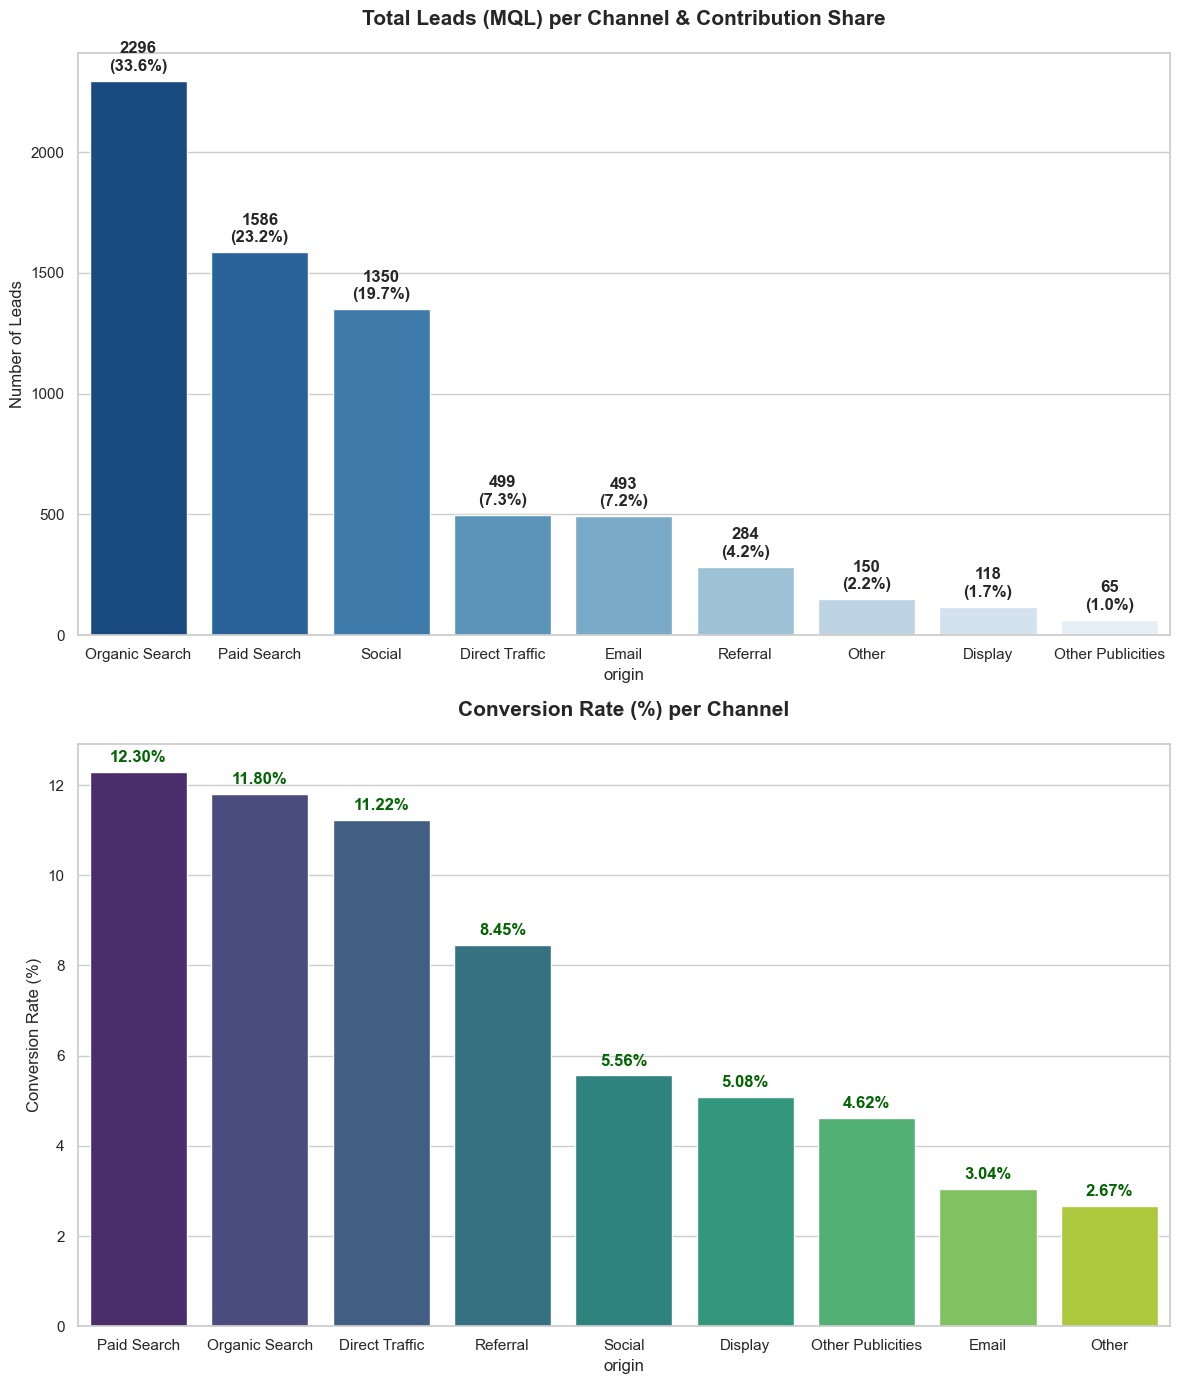

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung total leads keseluruhan untuk nyari persentase
grand_total_leads = df_filtered['total_leads'].sum()

# Set style
sns.set_theme(style="whitegrid")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14))

# --- GRAFIK 1: TOTAL LEADS (VOLUME + SHARE %) ---
df_leads_sorted = df_filtered.sort_values('total_leads', ascending=False)
sns.barplot(x=df_leads_sorted.index, y='total_leads', data=df_leads_sorted, palette='Blues_r', ax=ax1)

ax1.set_title('Total Leads (MQL) per Channel & Contribution Share', fontsize=15, fontweight='bold', pad=20)
ax1.set_ylabel('Number of Leads')

# Tambahin label Angka + Persentase di atas bar
for p in ax1.patches:
    percentage = (p.get_height() / grand_total_leads) * 100
    ax1.annotate(f'{int(p.get_height())}\n({percentage:.1f}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', 
                xytext = (0, 5), 
                textcoords = 'offset points',
                fontweight='bold')

# --- GRAFIK 2: CONVERSION RATE (QUALITY) ---
df_cr_sorted = df_filtered.sort_values('conversion_rate', ascending=False)
sns.barplot(x=df_cr_sorted.index, y='conversion_rate', data=df_cr_sorted, palette='viridis', ax=ax2)

ax2.set_title('Conversion Rate (%) per Channel', fontsize=15, fontweight='bold', pad=20)
ax2.set_ylabel('Conversion Rate (%)')

# Tambahin label persen di atas bar
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', 
                xytext = (0, 5), 
                textcoords = 'offset points',
                fontweight='bold', color='darkgreen')

plt.tight_layout()
plt.savefig('Total_Leads_&_conversion_rate_per_origin.png', dpi=300)
plt.show()


C:\Users\ACER\AppData\Local\Temp\ipykernel_22548\330496488.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=speed_analysis.index, y=speed_analysis.values, palette='Reds_r')


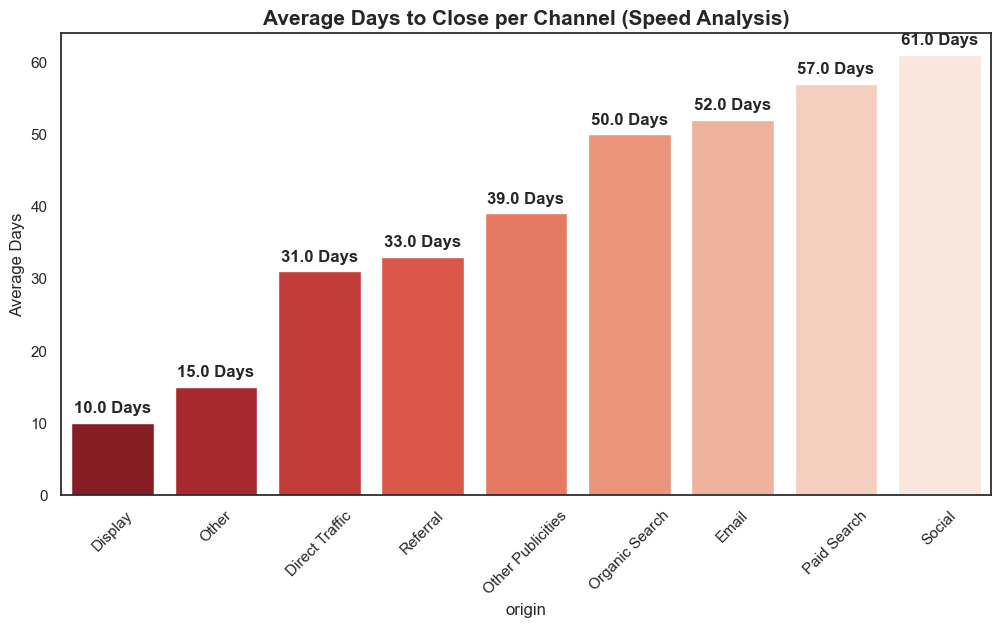

In [17]:
# Visualisasi conversion Speed Analysis
plt.figure(figsize=(12, 6))
sns.set_theme(style="white")

ax = sns.barplot(x=speed_analysis.index, y=speed_analysis.values, palette='Reds_r')

# Tambahin label hari di atas bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f} Days', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', 
                xytext = (0, 5), textcoords = 'offset points',
                fontweight='bold')

plt.title('Average Days to Close per Channel (Speed Analysis)', fontsize=15, fontweight='bold')
plt.ylabel('Average Days')
plt.xticks(rotation=45)
plt.savefig('Average_Days_to_Close_per_Origin.png', dpi=300)
plt.show()

In [18]:
df_marketing.to_csv('merged_marketing_data.csv', index=False)